In [37]:
import copy
from IPython.display import display, Image
import matplotlib.pyplot as plt
import numpy
import os
import pandas
import plotly
import six
import tensorflow as tf

import CS230

In [15]:
file_paths = CS230.data.get_all_file_paths()

# experiment #1
- input: steering/brake/throttle
- output: discrete derivative of all vehicle movement

### load data sets

In [17]:
file_path = file_paths[0]

data_columns = copy.deepcopy(CS230.data.COLUMNS_HUMAN_INPUT)
data_columns.extend(['vxCG', 'pitchAngle'])
#label_columns = [CS230.data.COLUMN_DERIV_PREFIX + '10_' + x for x in CS230.data.COLUMNS_MOTION]

train_percent = 0.9
dev_percent = 0.05
test_percent = 0.05

df = CS230.data.load(file_path)
df = CS230.data.stride_rows(df, stride=10)
#df, label_columns = CS230.data.add_derivatives(df, strides=[1])
#df = CS230.data.clean_discontinuities(df, stride=1)

#get_data_sets(df, strides=range(1, 11), train_percent=0.9, dev_percent=0.05, test_percent=0.05)

df_train, df_dev, df_test, data_columns, label_columns = CS230.data.get_data_sets(df, [1], train_percent, dev_percent, test_percent)

In [23]:
list(df_train.columns)

['time',
 'handwheelAngle',
 'throttle',
 'brake',
 'clutch',
 'engineSpeed',
 'PPS',
 'gpsTime',
 'latitude',
 'longitude',
 'altitude',
 'vNorth',
 'vEast',
 'vUp',
 'horizontalSpeed',
 'vxCG',
 'vyCG',
 'vzCG',
 'axCG',
 'ayCG',
 'azCG',
 'yawAngle',
 'pitchAngle',
 'rollAngle',
 'rollRate',
 'pitchRate',
 'yawRate',
 'sideSlip',
 'distance',
 'numSVsTracked',
 'gpsPosMode',
 'gpsVelMode',
 'gpsOrientMode',
 'HDOP',
 'PDOP',
 'posAccuracy_north',
 'posAccuracy_east',
 'posAccuracy_down',
 'velAccuracy_north',
 'velAccuracy_east',
 'velAccuracy_down',
 'orientAccuracy_heading',
 'orientAccuracy_pitch',
 'orientAccuracy_roll',
 'chassisAccelFL',
 'chassisAccelFR',
 'chassisAccelRL',
 'chassisAccelRR',
 'deflectionFL',
 'deflectionFR',
 'deflectionRL',
 'deflectionRR',
 'wheelAccelFL',
 'wheelAccelFR',
 'wheelAccelRL',
 'wheelAccelRR',
 'deriv_1_time',
 'deriv_1_handwheelAngle',
 'deriv_1_throttle',
 'deriv_1_brake',
 'deriv_1_clutch',
 'deriv_1_engineSpeed',
 'deriv_1_PPS',
 'deriv_1_

In [21]:
data_columns

['time',
 'handwheelAngle',
 'throttle',
 'brake',
 'clutch',
 'engineSpeed',
 'PPS',
 'gpsTime',
 'latitude',
 'longitude',
 'altitude',
 'vNorth',
 'vEast',
 'vUp',
 'horizontalSpeed',
 'vxCG',
 'vyCG',
 'vzCG',
 'axCG',
 'ayCG',
 'azCG',
 'yawAngle',
 'pitchAngle',
 'rollAngle',
 'rollRate',
 'pitchRate',
 'yawRate',
 'sideSlip',
 'distance',
 'numSVsTracked',
 'gpsPosMode',
 'gpsVelMode',
 'gpsOrientMode',
 'HDOP',
 'PDOP',
 'posAccuracy_north',
 'posAccuracy_east',
 'posAccuracy_down',
 'velAccuracy_north',
 'velAccuracy_east',
 'velAccuracy_down',
 'orientAccuracy_heading',
 'orientAccuracy_pitch',
 'orientAccuracy_roll',
 'chassisAccelFL',
 'chassisAccelFR',
 'chassisAccelRL',
 'chassisAccelRR',
 'deflectionFL',
 'deflectionFR',
 'deflectionRL',
 'deflectionRR',
 'wheelAccelFL',
 'wheelAccelFR',
 'wheelAccelRL',
 'wheelAccelRR',
 'deriv_1_time',
 'deriv_1_handwheelAngle',
 'deriv_1_throttle',
 'deriv_1_brake',
 'deriv_1_clutch',
 'deriv_1_engineSpeed',
 'deriv_1_PPS',
 'deriv_1_

In [18]:
label_columns

Index(['label_deriv_1_axCG', 'label_deriv_1_ayCG', 'label_deriv_1_azCG',
       'label_deriv_1_chassisAccelFL', 'label_deriv_1_chassisAccelFR',
       'label_deriv_1_chassisAccelRL', 'label_deriv_1_chassisAccelRR',
       'label_deriv_1_deflectionFL', 'label_deriv_1_deflectionFR',
       'label_deriv_1_horizontalSpeed', 'label_deriv_1_pitchAngle',
       'label_deriv_1_pitchRate', 'label_deriv_1_rollAngle',
       'label_deriv_1_rollRate', 'label_deriv_1_vxCG', 'label_deriv_1_vyCG',
       'label_deriv_1_vzCG', 'label_deriv_1_wheelAccelFL',
       'label_deriv_1_wheelAccelFR', 'label_deriv_1_wheelAccelRL',
       'label_deriv_1_wheelAccelRR', 'label_deriv_1_yawAngle',
       'label_deriv_1_yawRate'],
      dtype='object')

In [19]:
df.head()

,time,handwheelAngle,throttle,brake,clutch,engineSpeed,PPS,gpsTime,latitude,longitude,...,chassisAccelRL,chassisAccelRR,deflectionFL,deflectionFR,deflectionRL,deflectionRR,wheelAccelFL,wheelAccelFR,wheelAccelRL,wheelAccelRR
0,0.00,29.3,0.7,2.3,13.2,204,5.0,61377.09,NaN,NaN,...,-9.692,-9.614,-0.002,-0.003,0.003,0.001,9.91,9.91,9.61,9.96
1,0.01,29.4,0.7,0.5,13.2,204,5.0,61377.10,NaN,NaN,...,-9.663,-9.614,-0.002,-0.003,0.003,0.001,9.91,9.71,9.61,10.08
2,0.02,29.4,0.7,0.0,12.7,204,5.0,61377.11,NaN,NaN,...,-9.633,-9.614,-0.002,-0.003,0.003,0.001,9.91,9.71,9.81,10.11
3,0.03,29.4,0.7,0.0,12.7,204,5.0,61377.12,NaN,NaN,...,-9.633,-9.712,-0.002,-0.003,0.003,0.001,10.01,9.71,9.61,10.10
4,0.04,29.4,0.7,0.0,12.7,204,5.0,61377.13,NaN,NaN,...,-9.614,-9.712,-0.002,-0.003,0.003,0.001,10.20,9.61,9.91,9.99


In [24]:
df_train[data_columns].head()

,time,handwheelAngle,throttle,brake,clutch,engineSpeed,PPS,gpsTime,latitude,longitude,...,deriv_1_chassisAccelRL,deriv_1_chassisAccelRR,deriv_1_deflectionFL,deriv_1_deflectionFR,deriv_1_deflectionRL,deriv_1_deflectionRR,deriv_1_wheelAccelFL,deriv_1_wheelAccelFR,deriv_1_wheelAccelRL,deriv_1_wheelAccelRR
15223,152.23,-5.0,2.2,0.0,18.1,1506,5.0,61529.33,36.587503,-121.755275,...,0.059,0.687,0.0,0.000,0.0,0.000,-0.39,-0.10,-1.27,0.59
74385,743.85,-33.0,0.8,0.0,25.0,204,5.0,62120.98,36.587971,-121.754810,...,0.167,-0.098,0.0,0.000,0.0,0.000,-0.09,-0.30,-0.29,-0.05
114564,1145.64,49.2,0.9,0.0,0.0,3312,5.0,62522.79,36.582658,-121.757681,...,-0.118,0.294,0.0,-0.001,0.0,-0.001,-8.14,-10.11,9.71,-12.53
71120,711.20,-33.1,0.8,0.0,26.5,204,5.0,62088.33,36.587971,-121.754809,...,0.118,0.000,0.0,0.000,0.0,0.000,-0.29,-0.30,0.10,0.04
195973,1959.73,-14.7,10.4,0.0,65.2,4338,5.0,63336.91,36.585633,-121.749648,...,2.423,-0.785,0.0,0.000,0.0,-0.001,3.92,3.24,22.17,-15.25


In [25]:
df_train[label_columns].head()

,label_deriv_1_axCG,label_deriv_1_ayCG,label_deriv_1_azCG,label_deriv_1_chassisAccelFL,label_deriv_1_chassisAccelFR,label_deriv_1_chassisAccelRL,label_deriv_1_chassisAccelRR,label_deriv_1_deflectionFL,label_deriv_1_deflectionFR,label_deriv_1_horizontalSpeed,...,label_deriv_1_rollRate,label_deriv_1_vxCG,label_deriv_1_vyCG,label_deriv_1_vzCG,label_deriv_1_wheelAccelFL,label_deriv_1_wheelAccelFR,label_deriv_1_wheelAccelRL,label_deriv_1_wheelAccelRR,label_deriv_1_yawAngle,label_deriv_1_yawRate
15223,-0.22,-0.23,-0.15,1.687,-0.157,0.147,0.196,0.000,0.000,-0.01,...,0.45,-0.01,0.01,-0.01,1.57,-0.68,-1.18,1.34,-0.01,0.28
74385,0.07,-0.05,-0.15,0.157,-0.157,0.117,0.294,0.000,0.000,0.00,...,-0.17,0.00,0.00,0.00,0.09,-0.09,0.00,0.33,0.00,0.14
114564,0.04,-0.05,0.00,-0.432,-1.050,1.373,2.453,-0.001,-0.001,-0.02,...,0.00,-0.02,0.00,-0.01,-11.38,-14.52,11.57,-15.26,0.28,0.00
71120,-0.01,-0.05,-0.08,0.000,-0.128,0.059,0.098,0.000,0.000,0.00,...,-0.32,0.00,-0.00,-0.01,0.00,-0.29,0.00,0.15,0.00,-0.09
195973,0.06,1.68,0.52,4.601,-6.268,-3.492,-0.785,0.000,0.000,0.01,...,18.87,0.00,-0.01,0.02,3.93,-6.38,-11.09,24.81,-0.11,0.42


In [26]:
df_train.head()

,time,handwheelAngle,throttle,brake,clutch,engineSpeed,PPS,gpsTime,latitude,longitude,...,label_deriv_1_rollRate,label_deriv_1_vxCG,label_deriv_1_vyCG,label_deriv_1_vzCG,label_deriv_1_wheelAccelFL,label_deriv_1_wheelAccelFR,label_deriv_1_wheelAccelRL,label_deriv_1_wheelAccelRR,label_deriv_1_yawAngle,label_deriv_1_yawRate
15223,152.23,-5.0,2.2,0.0,18.1,1506,5.0,61529.33,36.587503,-121.755275,...,0.45,-0.01,0.01,-0.01,1.57,-0.68,-1.18,1.34,-0.01,0.28
74385,743.85,-33.0,0.8,0.0,25.0,204,5.0,62120.98,36.587971,-121.754810,...,-0.17,0.00,0.00,0.00,0.09,-0.09,0.00,0.33,0.00,0.14
114564,1145.64,49.2,0.9,0.0,0.0,3312,5.0,62522.79,36.582658,-121.757681,...,0.00,-0.02,0.00,-0.01,-11.38,-14.52,11.57,-15.26,0.28,0.00
71120,711.20,-33.1,0.8,0.0,26.5,204,5.0,62088.33,36.587971,-121.754809,...,-0.32,0.00,-0.00,-0.01,0.00,-0.29,0.00,0.15,0.00,-0.09
195973,1959.73,-14.7,10.4,0.0,65.2,4338,5.0,63336.91,36.585633,-121.749648,...,18.87,0.00,-0.01,0.02,3.93,-6.38,-11.09,24.81,-0.11,0.42


### define model

In [33]:
m = df_train[data_columns].shape[0]
n_x = df_train[data_columns].shape[1]
n_y = df_train[label_columns].shape[1]

In [34]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(len(data_columns), activation='relu', input_shape=(1, n_x)))

#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(len(label_columns), activation='relu'))

#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(len(label_columns), activation='relu'))

#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(len(label_columns), activation='relu'))

#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(len(label_columns), activation='sigmoid'))

In [35]:
#optimizer = tf.train.AdamOptimizer(0.001)
optimizer = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(
    optimizer=optimizer, 
    loss='mean_squared_error', 
    metrics=['mean_absolute_error']  # mean absolute error
)

Instructions for updating:
Use tf.cast instead.


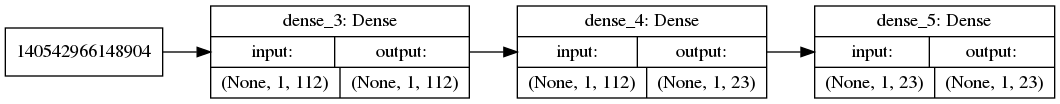

models/tf_experiments/1.png


In [40]:
# visualize model
file_path = os.path.join('models', 'tf_experiments', '1.png')
tf.keras.utils.plot_model(model, file_path, show_shapes=True, show_layer_names=True, rankdir='LR')
display(Image(filename=file_path))
print(file_path)

### view training data set

In [10]:
df_train.head()

,brake,throttle,handwheelAngle,vxCG,deriv_axCG,deriv_ayCG,deriv_pitchAngle,deriv_pitchRate,deriv_rollAngle,deriv_rollRate,deriv_vxCG,deriv_vyCG,deriv_wheelAccelFL,deriv_wheelAccelFR,deriv_wheelAccelRL,deriv_wheelAccelRR,deriv_yawAngle,deriv_yawRate
2331,0.0,0.9,-6.0,0.02,-0.04,-0.03,0.10,-0.28,-0.06,-0.30,0.01,0.01,-0.29,0.00,0.19,-0.25,0.00,0.13
2232,0.0,1.3,48.7,3.31,0.21,-0.06,0.11,0.51,0.45,-2.27,-0.19,0.05,0.88,-0.29,0.39,0.01,6.41,3.23
66,0.0,2.2,60.8,-0.03,3.05,-0.60,0.00,0.26,0.00,2.38,0.03,-0.04,3.44,0.19,1.28,0.67,0.00,-6.66
1363,3.7,2.9,-1.8,35.85,-0.47,1.82,0.37,-3.80,-0.35,1.87,-4.08,0.09,-6.97,-19.13,-16.68,9.74,1.34,2.26
611,0.0,0.8,-33.1,-0.01,-0.01,-0.11,0.00,0.06,0.00,-0.09,0.00,0.01,-0.09,0.10,-0.10,-0.13,-0.02,1.04


In [11]:
df_train[data_columns].head()

,brake,throttle,handwheelAngle,vxCG
2331,0.0,0.9,-6.0,0.02
2232,0.0,1.3,48.7,3.31
66,0.0,2.2,60.8,-0.03
1363,3.7,2.9,-1.8,35.85
611,0.0,0.8,-33.1,-0.01


In [12]:
df_train[label_columns].head()

,deriv_axCG,deriv_ayCG,deriv_pitchAngle,deriv_pitchRate,deriv_rollAngle,deriv_rollRate,deriv_vxCG,deriv_vyCG,deriv_wheelAccelFL,deriv_wheelAccelFR,deriv_wheelAccelRL,deriv_wheelAccelRR,deriv_yawAngle,deriv_yawRate
2331,-0.04,-0.03,0.10,-0.28,-0.06,-0.30,0.01,0.01,-0.29,0.00,0.19,-0.25,0.00,0.13
2232,0.21,-0.06,0.11,0.51,0.45,-2.27,-0.19,0.05,0.88,-0.29,0.39,0.01,6.41,3.23
66,3.05,-0.60,0.00,0.26,0.00,2.38,0.03,-0.04,3.44,0.19,1.28,0.67,0.00,-6.66
1363,-0.47,1.82,0.37,-3.80,-0.35,1.87,-4.08,0.09,-6.97,-19.13,-16.68,9.74,1.34,2.26
611,-0.01,-0.11,0.00,0.06,0.00,-0.09,0.00,0.01,-0.09,0.10,-0.10,-0.13,-0.02,1.04


### split input data from output labels

In [13]:
x_train = tf.cast(df_train[data_columns].values, tf.float32)
y_train = tf.cast(df_train[label_columns], tf.float32)

### train model

In [14]:
history = model.fit(x_train, y_train, epochs=50, steps_per_epoch=1000)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1000/1000 [==============================] - 1s 780us/step - loss: 33.8145 - mean_absolute_error: 2.7357
Epoch 2/50
1000/1000 [==============================] - 1s 752us/step - loss: 33.7101 - mean_absolute_error: 2.7050
Epoch 3/50
1000/1000 [==============================] - 1s 744us/step - loss: 33.6905 - mean_absolute_error: 2.7017
Epoch 4/50
1000/1000 [==============================] - 1s 747us/step - loss: 33.6785 - mean_absolute_error: 2.6998
Epoch 5/50
1000/1000 [==============================] - 1s 733us/step - loss: 33.6738 - mean_absolute_error: 2.6986
Epoch 6/50
1000/1000 [==============================] - 1s 737us/step - loss: 33.6711 - mean_absolute_error: 2.6980
Epoch 7/50
1000/1000 [==============================] - 1s 743us/step - loss: 33.6691 - mean_absolute_error: 2.6976
Epoch 8/50
1000/1000 [==============================] - 1s 735us/step - loss: 33.6676 - mean

Text(0.5, 0, 'epoch')

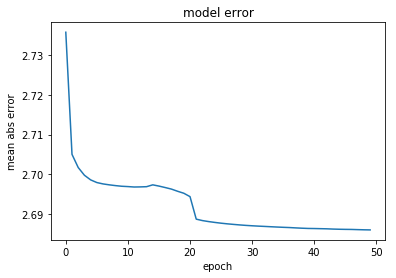

In [15]:
plt.plot(history.history['mean_absolute_error'])
#plt.plot(history.history['val_acc'])
plt.title('model error')
plt.ylabel('mean abs error')
plt.xlabel('epoch')

### view dev set

In [16]:
df_dev.head()

,brake,throttle,handwheelAngle,vxCG,deriv_axCG,deriv_ayCG,deriv_pitchAngle,deriv_pitchRate,deriv_rollAngle,deriv_rollRate,deriv_vxCG,deriv_vyCG,deriv_wheelAccelFL,deriv_wheelAccelFR,deriv_wheelAccelRL,deriv_wheelAccelRR,deriv_yawAngle,deriv_yawRate
1714,0.0,6.6,0.4,49.95,-2.58,4.33,0.42,-3.03,-0.08,-6.62,-6.01,0.01,6.18,-4.91,2.74,29.36,0.44,-1.11
154,0.0,2.2,-3.3,5.36,0.51,-0.92,0.19,0.96,-0.37,0.36,0.00,0.03,5.00,-7.36,-2.55,5.41,0.00,0.85
693,0.0,0.8,-33.1,0.00,0.02,-0.05,0.00,0.27,-0.03,-0.43,0.01,-0.01,0.00,-0.20,0.20,0.02,0.01,-0.32
1338,0.0,56.6,-23.2,33.35,-4.21,3.92,0.67,5.10,-0.70,-5.86,2.39,-0.62,-16.39,-12.07,-23.25,-2.15,-14.30,7.21
2006,0.0,41.7,42.0,24.18,-0.69,-6.39,0.22,-1.03,0.02,-3.55,5.18,0.51,-2.35,7.75,5.29,-0.28,14.21,-16.75


In [17]:
x_dev = tf.cast(df_dev[CS230.data.COLUMNS_HUMAN_INPUT].values, tf.float32)
y_dev = tf.cast(df_dev[CS230.data.COLUMNS_DERIV].values, tf.float32)

### predict against dev set

In [18]:
dev_predictions = model.predict(x_dev, steps=1)

In [19]:
df_dev_predictions = pandas.DataFrame(dev_predictions, columns=CS230.data.COLUMNS_DERIV)
df_dev_predictions.head()

,deriv_axCG,deriv_ayCG,deriv_pitchAngle,deriv_pitchRate,deriv_rollAngle,deriv_rollRate,deriv_vxCG,deriv_vyCG,deriv_wheelAccelFL,deriv_wheelAccelFR,deriv_wheelAccelRL,deriv_wheelAccelRR,deriv_yawAngle,deriv_yawRate
0,7.152557e-07,0.000009,1.490116e-07,0.000000e+00,0.0,7.748604e-07,0.029784,0.000004,2.980232e-07,2.980232e-07,0.000000e+00,0.0,0.0,0.000045
1,9.508641e-01,0.000000,0.000000e+00,1.192093e-07,0.0,1.000000e+00,0.016378,0.000000,0.000000e+00,0.000000e+00,8.940697e-08,0.0,1.0,0.000000
2,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,1.000000e+00,0.324297,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.0,0.000000
3,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000
4,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.019568,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000


In [20]:
df_dev.head()

,brake,throttle,handwheelAngle,vxCG,deriv_axCG,deriv_ayCG,deriv_pitchAngle,deriv_pitchRate,deriv_rollAngle,deriv_rollRate,deriv_vxCG,deriv_vyCG,deriv_wheelAccelFL,deriv_wheelAccelFR,deriv_wheelAccelRL,deriv_wheelAccelRR,deriv_yawAngle,deriv_yawRate
1714,0.0,6.6,0.4,49.95,-2.58,4.33,0.42,-3.03,-0.08,-6.62,-6.01,0.01,6.18,-4.91,2.74,29.36,0.44,-1.11
154,0.0,2.2,-3.3,5.36,0.51,-0.92,0.19,0.96,-0.37,0.36,0.00,0.03,5.00,-7.36,-2.55,5.41,0.00,0.85
693,0.0,0.8,-33.1,0.00,0.02,-0.05,0.00,0.27,-0.03,-0.43,0.01,-0.01,0.00,-0.20,0.20,0.02,0.01,-0.32
1338,0.0,56.6,-23.2,33.35,-4.21,3.92,0.67,5.10,-0.70,-5.86,2.39,-0.62,-16.39,-12.07,-23.25,-2.15,-14.30,7.21
2006,0.0,41.7,42.0,24.18,-0.69,-6.39,0.22,-1.03,0.02,-3.55,5.18,0.51,-2.35,7.75,5.29,-0.28,14.21,-16.75
